## 타이타닉 생존자 예측 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./data/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
# 데이터 칼럼 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age의 Null값을 평균으로 대체
- 나머지 컬럼의 Null 값은 N으로 대체

In [3]:
titanic_df.isnull().sum()
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

- 문자열(object)타입 중에 Sex, Cabin, Embarked의 값 분류

In [4]:
print('Sex값 분포:\n', titanic_df['Sex'].value_counts())
print('\nCabin값 분포:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked값 분포:\n', titanic_df['Embarked'].value_counts())

Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin값 분포:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
C104             1
B102             1
A36              1
B78              1
E10              1
Name: Cabin, Length: 148, dtype: int64

Embarked값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Sex와 Embarked는 값에 따라 분류가 명확하나
- Cabin('선실')의 경우 분류가 많고 정리가 되어 있지 않다. 따라서 첫 알파벳만 추출한다.

In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


- 데이터를 먼저 탐색해보자
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
    1. 성별이 어떤 영향을 미쳤는지

In [6]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

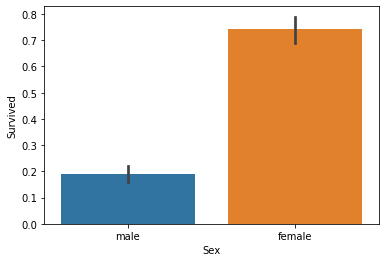

In [7]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

- 어떤 유형의 승객이 생존 확률이 높았는지 확인
    2. 부자와 가난한 사람간의 생존 확률 : 객실 등급에 따라

In [8]:
titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

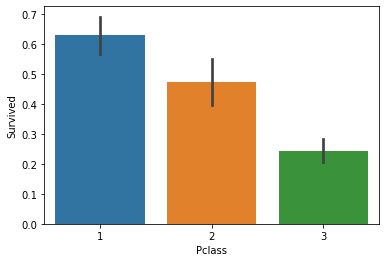

In [9]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

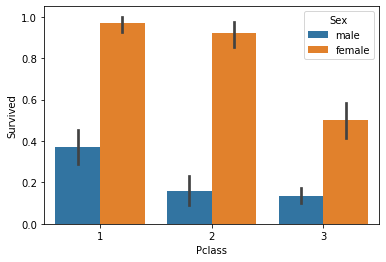

In [10]:
# 성별을 포함하여 보자

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 어떤 유형의 승객이 생존 확률이 높았는지 확인
    3. 나이에 따른 생존률은?<br>
    그런데 Age는 값의 종류가 많기 때문에 카테고리화 필요<br>
    0-5 : baby, 6-12 : Child, 13-18 : Teenager,<br> 
    19-25 : Student, 26-35 : Young Adult, <br>
    36-60 : Adult, 61이상 : Elderly<br>
    -1 이하는 Unknown
  

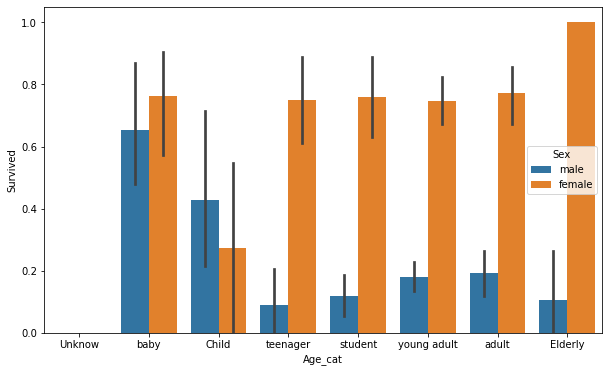

In [11]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정
# DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'teenager'
    elif age <= 25: cat = 'student'
    elif age <= 35: cat = 'young adult'
    elif age <= 60: cat = 'adult'
    else: cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

group_names = ['Unknow','baby','Child','teenager','student','young adult','adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
#titanic_df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
- 문자열 카테고리 > 숫자형 카테고리 변환
- LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ 유형수 -1까지 변환
- encode_features() 함수 생성

- 문자열 카테고리 > 숫자형 카테고리 변환 (1번 예시) 

```
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic_df['Cabin'])
titanic_df['Cabin'] = le.transform(titanic_df['Cabin'])
le.fit(titanic_df['Sex'])
titanic_df['Sex'] = le.transform(titanic_df['Sex'])
le.fit(titanic_df['Embarked'])
titanic_df['Embarked'] = le.transform(titanic_df['Embarked'])

titanic_df.head(3)
```

- 문자열 카테고리 > 숫자형 카테고리 변환 (2번 예시) 

```
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
    le.fit(titanic_df[feature])
    titanic_df[feature] = le.transform(titanic_df[feature])
titanic_df.head(3)
```

In [13]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,young adult
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3,young adult
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,7,2,young adult
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,4,3,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,7,3,baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,7,3,young adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,7,0,teenager


### Preprocessing Function 모음

In [25]:
# Null 처리
def fillna_mean(df, data):
    df[data].fillna(df[data].mean(), inplace=True)
    return df

def fillna_n(df, data):
    df[data].fillna('N', inplace=True)
    return df

def fillna_zero(df, data):
    df[data].fillna(0, inplace=True)
    return df

In [26]:
#  불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

def transform_features(df):
    df = fillna_mean(df, 'Age')
    df = fillna_n(df, 'Cabin')
    df = fillna_n(df, 'Embarked')
    df = fillna_zero(df, 'Fare')
    df = drop_features(df)
    df = format_features(df)
    
    return df

- 피처 데이터세트와 레이블 데이터세트 추출

In [27]:
# x, y 추출
titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)

x_titanic_df = transform_features(x_titanic_df)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

## 생존자 예측
- 위에 전처리 데이터를 가지고 3가지 알고리즘으로 예측해본다.
- 결정트리(DecisionTreeClassifier)
- 랜덤포레스트(RandomForestClassifier)
- 로지스틱회귀(LogisticRegression)
- 학습순서
    1. data load
    2. data preprocessing
    3. data train_test_split
    4. data fit and predict
    5. data 성능 평가 : accuracy_score()

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 각 알고리즘 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 교차검증수행 1 - KFold
- 교차 검증 : 사이킷런 model_selection 패키지의 KFold클래스, cross_val_score(), GridSearchCV 클래스 사용


In [84]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        # x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도:{0:.4f}'.format(mean_score))

# exec_kfold 호출
dt_clf = DecisionTreeClassifier(random_state=11)
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.754190
교차 검증 1 정확도: 0.780899
교차 검증 2 정확도: 0.786517
교차 검증 3 정확도: 0.769663
교차 검증 4 정확도: 0.820225
평균 정확도:0.7823


### 교차검증수행 2 - cross_val_score()

In [87]:
# cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
# StratifiedKFold 사용
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도:0.7430
교차 검증 1 정확도:0.7753
교차 검증 2 정확도:0.7921
교차 검증 3 정확도:0.7865
교차 검증 4 정확도:0.8427
평균 정확도: 0.7879


### GridSearchCV
- DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측
- CV = 5, 하이퍼 파라미터 max_depth, min_samples_split, min_samples_leaf

In [89]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
